# Hello PyWavelets

## Wavelets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

%matplotlib inline

In [2]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [3]:
pywt.wavelist(family='sym')

['sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',
 'sym14',
 'sym15',
 'sym16',
 'sym17',
 'sym18',
 'sym19',
 'sym20']

Wavelet db2
  Family name:    Daubechies
  Short name:     db
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


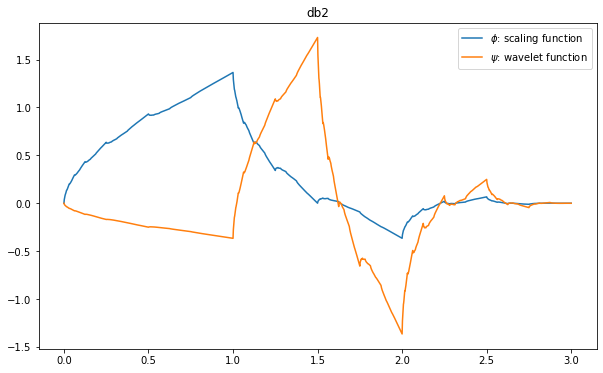

In [19]:
wavelet = pywt.Wavelet('db2')
print(wavelet)

# scaling/wavelet functions
phi, psi, x = wavelet.wavefun(level=10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, phi)
ax.plot(x, psi)
ax.set_title('db2')
ax.legend(['$\phi$: scaling function', '$\psi$: wavelet function']);

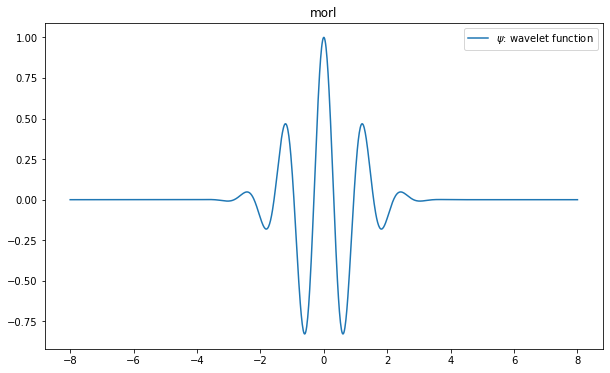

In [20]:
wavelet = pywt.ContinuousWavelet('morl')
psi, x = wavelet.wavefun(level=10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, psi)
ax.set_title('morl')
ax.legend(['$\psi$: wavelet function']);

Wavelet bior3.5
  Family name:    Biorthogonal
  Short name:     bior
  Filters length: 12
  Orthogonal:     False
  Biorthogonal:   True
  Symmetry:       symmetric
  DWT:            True
  CWT:            False


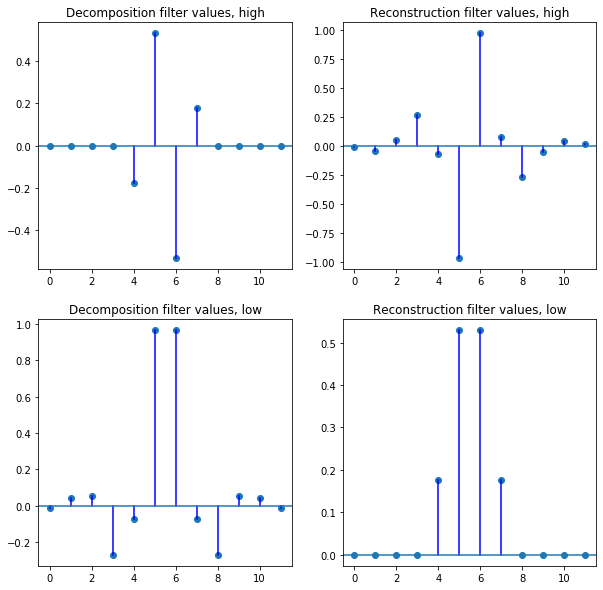

In [29]:
wavelet = pywt.Wavelet('bior3.5')
print(wavelet)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

def plot_discrete(y, title, ax=plt):
    x = list(range(len(y)))
    ax.plot(x, y, 'o')
    for x1, y1 in zip(x, y):
        ax.plot([x1, x1], [0, y1], 'b')
    ax.axhline(0)
    ax.set_title(title)
    

plot_discrete(wavelet.dec_hi, 'Decomposition filter values, high', ax=axs[0][0])
plot_discrete(wavelet.dec_lo, 'Decomposition filter values, low', ax=axs[1][0])
plot_discrete(wavelet.rec_hi, 'Reconstruction filter values, high', ax=axs[0][1])
plot_discrete(wavelet.rec_lo, 'Reconstruction filter values, low', ax=axs[1][1])

## Decomposition/Reconstruction

### with wavedec/waverec methods

Reference: a square wave of fig. 17.1 from the book, D.E.Newland, An introduction to random vibrations, spectral & wavelet analysis, 3rd edition

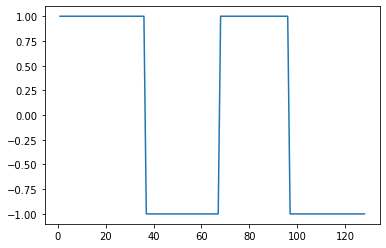

In [40]:
steps = np.linspace(1, 128, 128)
data = np.ones(128)
data[36:67] = -1.0
data[96:] = -1.0
plt.plot(steps, data);

In [31]:
w = pywt.Wavelet('sym4')
w.dec_len

8

In [32]:
maxlev = pywt.dwt_max_level(len(data), w.dec_len)
maxlev

4

In [33]:
coeffs = pywt.wavedec(data, 'sym4', level=maxlev)

In [34]:
for i, coeff in enumerate(coeffs):
    print(i, coeff.shape)

0 (14,)
1 (14,)
2 (22,)
3 (37,)
4 (67,)


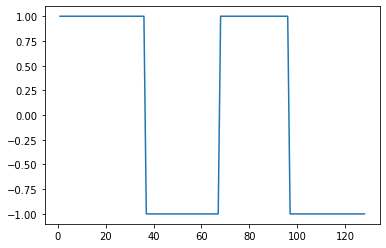

In [35]:
datarec = pywt.waverec(coeffs, 'sym4')
plt.plot(steps, datarec)

### Equivalant manual decomposition to the wavedec method

In [36]:
coeffs2 = []
cD = data
for _ in range(maxlev):
    cA, cD = pywt.dwt(cD, 'sym4')
    coeffs2.append(cD)
    cD = cA
coeffs2.append(cD)
coeffs2 = list(reversed(coeffs2))

In [37]:
for i, coeff in enumerate(coeffs2):
    print(i, coeff.shape)

0 (14,)
1 (14,)
2 (22,)
3 (37,)
4 (67,)


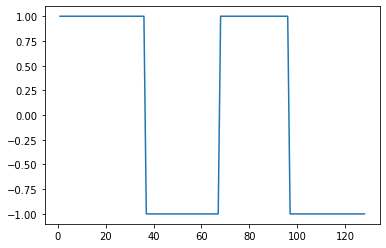

In [38]:
datarec2 = pywt.waverec(coeffs2, 'sym4')
plt.plot(steps, datarec2)

# denoising

Reference: https://github.com/MProx/Wavelet-denoising

In [42]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/noise_signal.csv')
df.head()

,heart
0,-5.955
1,-5.955
2,-5.955
3,-5.955
4,-5.955


In [44]:
start = 100
# df['heart'].iloc[start:start + 1024].plot()
data = df['heart'].iloc[start:start + 1024].values

w = pywt.Wavelet('sym4')
maxlev = pywt.dwt_max_level(len(data), w.dec_len)
coeffs = pywt.wavedec(data, 'sym4', level=maxlev)

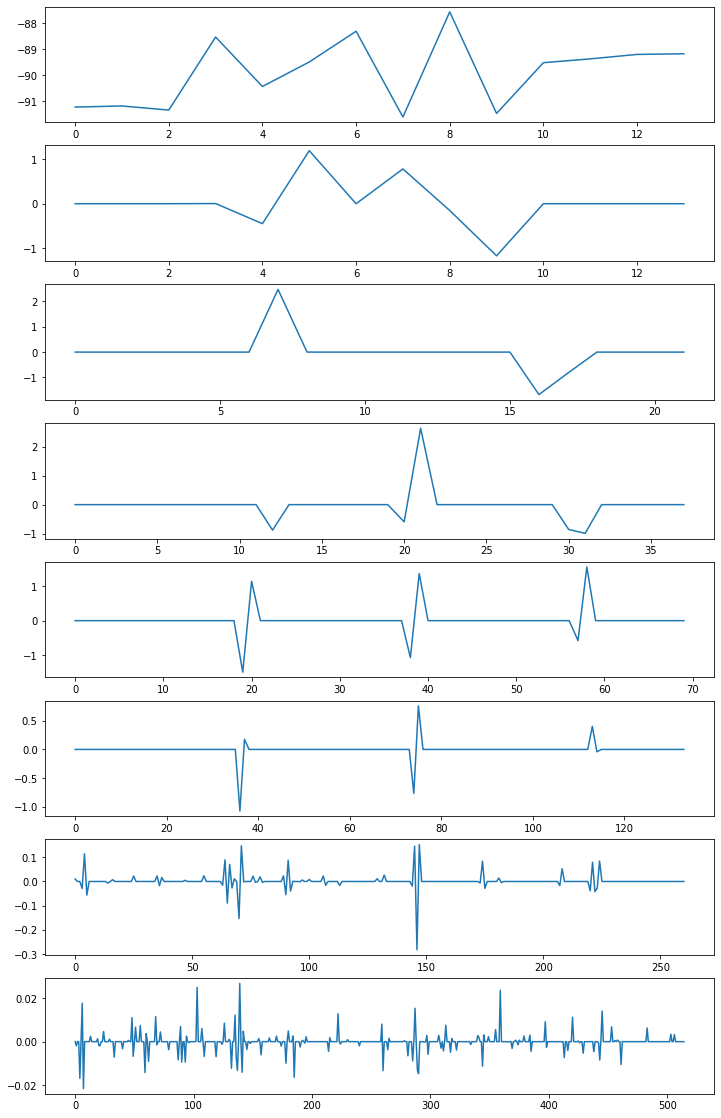

In [46]:
threshold = 0.3

fig, axs = plt.subplots(maxlev + 1, 1, figsize=(12, 20))
coeffs_denoised = []
for i, coeff in enumerate(coeffs):
    coeffs_denoised.append(pywt.threshold(coeff, threshold * max(coeff)))
    axs[i].http://localhost:8888/notebooks/hellos/wavelet2.ipynb#denoisingplot(coeffs_denoised[i])

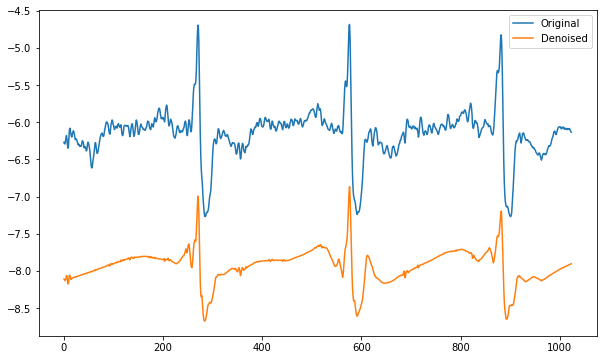

In [47]:
data_denoised = pywt.waverec(coeffs_denoised, 'sym4')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data)
ax.plot(data_denoised)
ax.legend(['Original', 'Denoised'])

# Denosing trading data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pywt

In [2]:
df = pd.read_csv('./data/sample3.csv')
len(df), df.head()

mother = 'sym4'

len_seq = len(df)
seq = df['close'].values
w = pywt.Wavelet(mother)
maxlev = pywt.dwt_max_level(len_seq, w.dec_len)
coeffs = pywt.wavedec(seq, mother, level=maxlev)

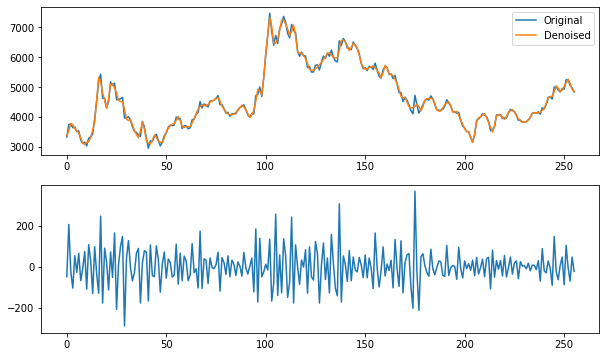

In [15]:
cA, cD = pywt.dwt(seq, 'sym4')
A = pywt.idwt(cA, None, 'sym4')
D = pywt.idwt(None, cD, 'sym4')

fig, axs = plt.subplots(2, figsize=(10, 6))

df['close'].plot(ax=axs[0])
axs[0].plot(A)
# axs[0].set_xlim(150, 200)
axs[0].legend(['Original', 'Denoised'])

axs[1].plot(D)
# axs[2].plot(cD)

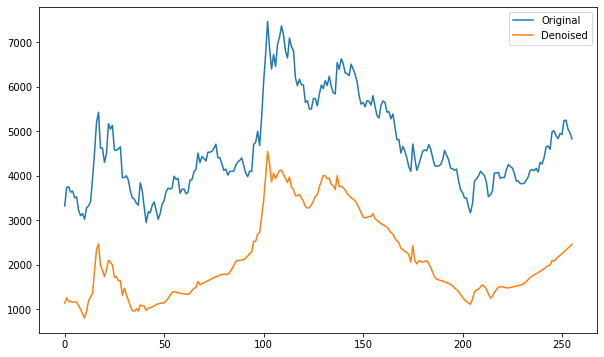

In [3]:
threshold = 0.4

# fig, axs = plt.subplots(maxlev + 1, 1, figsize=(12, 20))
coeffs2 = []
for i, coeff in enumerate(coeffs):
    coeffs2.append(pywt.threshold(coeff, threshold * max(coeff)))
#     axs[i].plot(coeffs2[i])

datarec = pywt.waverec(coeffs2, mother)

fig, ax = plt.subplots(figsize=(10, 6))
df['close'].plot(ax=ax)
ax.plot(datarec)
ax.legend(['Original', 'Denoised'])

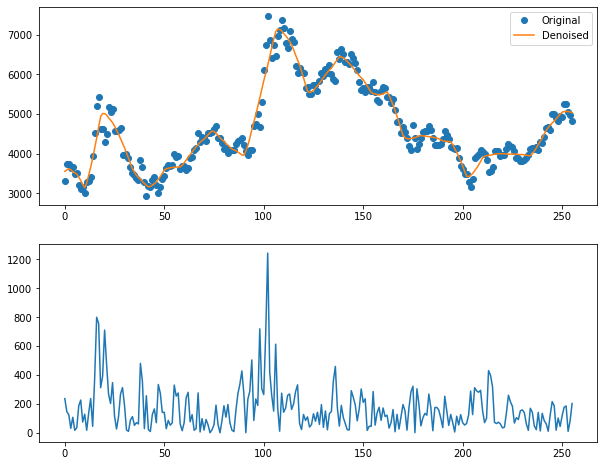

In [89]:
level = 3
A = seq.copy()
coeffs = pywt.wavedec(A, 'sym4', level=level)
icoeffs = list(map(lambda x: np.zeros_like(x), coeffs))
icoeffs[0] = coeffs[0]
A_denoised = pywt.waverec(icoeffs, 'sym4')

fig, axs = plt.subplots(2, figsize=(10, 8))

df['close'].plot(style='o', ax=axs[0])
axs[0].plot(A_denoised)
axs[0].legend(['Original', 'Denoised'])
axs[1].plot(np.abs(A - A_denoised))

In [90]:
np.sqrt(np.var(A - A_denoised))

226.2089197402053